# Group Project - Machine Intelligence and Society 2023

### Important Notice

<!-- Markdown!!! -->
The project is about basic machine learning methods and fairness in machine learning associated with the Machine Intelligence and Society 2023 course. The members of this group is following:

<!-- Markdown!!! -->
<!-- 각자 파트/student ID/이름 스펠링 확인!! -->

| Matrikelnummer|  Name        | Responsibility    |    Program                                 |
|:-------------:|:------------:|:-----------------:|:------------------------------------------:|
|    03700000   |  Mingi Kang  |   report /        | Bachelor Elektro- und Informationstechnik  |
|    03722924   |  Semin Kim   | analysis / report | Bachelor Elektro- und Informationstechnik  |
|    03700000   |  Seyoung Kim | research / report | Bachelor Elektro- und Informationstechnik  |
|    03745303   | Taeyoung Kim |    programming    | Bachelor Elektro- und Informationstechnik  |


## INTRODUCTION OF THIS PROJECT

The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). 
This includes to identify and deal with any outliers, missing values etc. and to encode and scale features appropriately and the task is to classify if a person will be arrested or not. This project consists of a total of 4 modules: preprocessing, training, validation and testing.

# remove unnecessary code before submit!!!
# comment all code!!!
# all comment start with big alphabet

## PREPROCESSING 

In [1]:
# Remove unnecessary code before submit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
#Read data
df = pd.read_csv("NC_policing.csv")

Check the component of dataset with method info/head/unique

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [4]:
# Show the number of unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

state: 1 unique values
stop_date: 5632 unique values
driver_gender: 2 unique values
driver_age: 83 unique values
driver_race_raw: 10 unique values
driver_race: 5 unique values
violation: 8 unique values
search_type: 6 unique values
contraband_found: 2 unique values
stop_outcome: 2 unique values
search_basis: 33 unique values
officer_id: 3018 unique values
drugs_related_stop: 1 unique values
district: 57 unique values


In [5]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

### Processing the missing values

In [6]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [7]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [8]:
# only 38 data missed, = keinen Einfluss auf dataset
df.dropna(subset=['district'], inplace=True)

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397670
district                   0
dtype: int64

### 데이터 정리하기(필요한 데이터/불필요데이터 처리, ml위해 데이터 폼 변형etc)

삭제할 컬럼(사용되지 않음) : state, stop_date, driver_race_raw, contraband_found, drug_related_stop, district 혹은 officer_id 둘 중 하나(아직 결정 못함 두 컬럼이 비슷한 관계..)
처리 후 필요최소한 사용 컬럼 : violation, search_type

state : 모든 컬럼 동일값 => ml에 큰 의미x
stop_date : 데이터가 너무 광범위하고, ....
driver_race_raw : dirver_race 컬럼과 유사하다
contraband_found : stop_outcome인 y variable과 유사하다.
drug_related_stop : 너무 많은 값이 빠져있어서 데이터로서의 가치 없음.



In [9]:
df_encoded = df.copy()

# NaN 값이 너무 많은 컬럼 drugs_related_stop
# 모든 값이 동일한 컬럼 state
# 유사한 정보를 가지고 있는 컬럼 driver_race_raw (similar with driver_race)
df_encoded = df_encoded.drop(['drugs_related_stop','state'], axis=1)


# test (remove this code before submit)
df_encoded.head().T

,0,1,2,3,4
stop_date,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-07-31
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,False,False,False,False,False
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted


### Converting 'stop_date' to datetime format
1. change format
2. inspect tendency & (necessary or not)
3. conclusion : drop year, month and day, but day of week can be used.

In [10]:
# Convert 'stop_date' to datetime format
df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
df_encoded['year'] = df_encoded['stop_date'].dt.year
df_encoded['month'] = df_encoded['stop_date'].dt.month
df_encoded['day'] = df_encoded['stop_date'].dt.day
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)

# Check the dataset of df_encoded
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,False,False,False,False,False
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606


# 그래프 둘 중 하나 선택하면 될듯

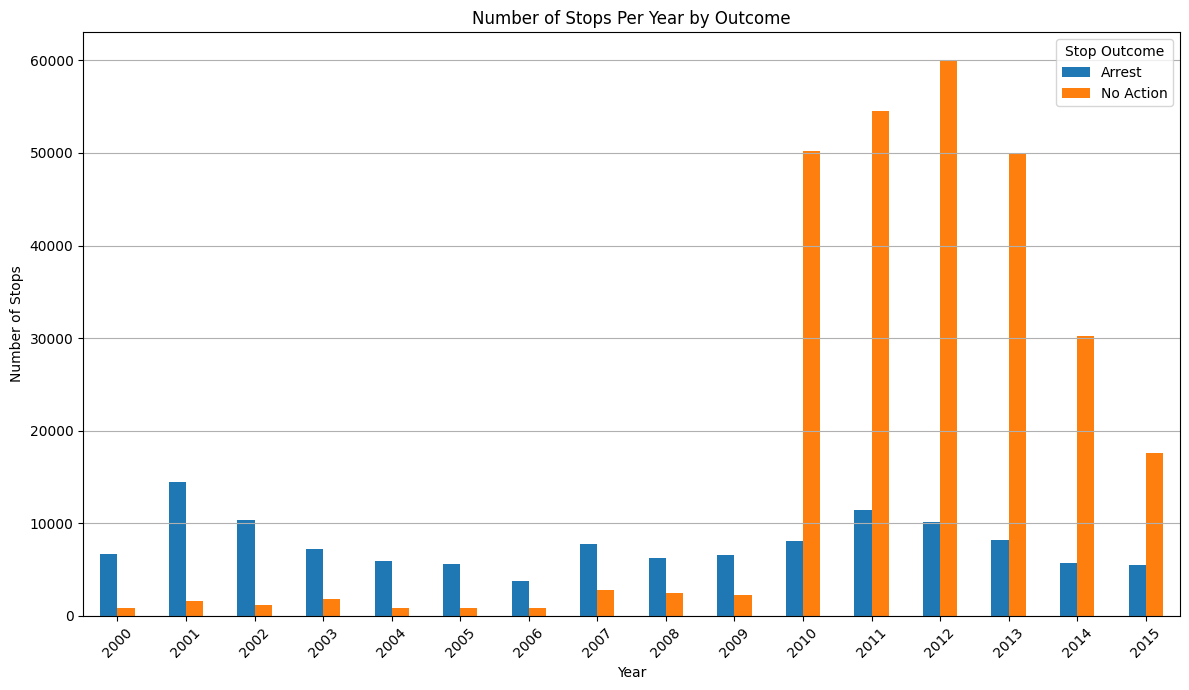

In [11]:
# year ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['year', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Year by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

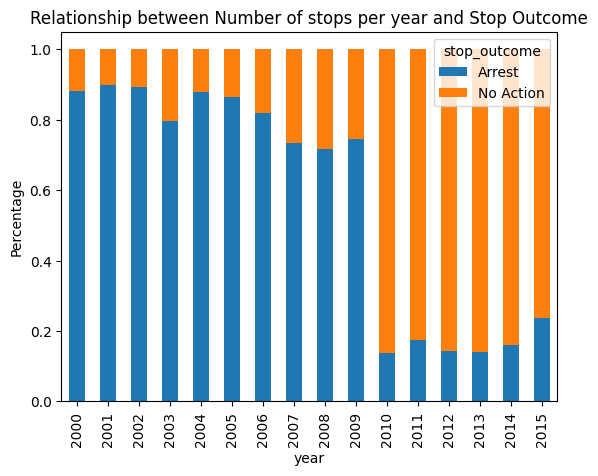

In [12]:
# Plot for Relationship between Number of stops per year and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['year'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per year and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

# Relationship btw year ~ stop_outcome

# 경향성 : 2010년대 이후로 No Action이 크게 증가 
# 해석 : 각 연도의 총 검문 횟수 데이터가 있나? 없으면 경향성 not logical

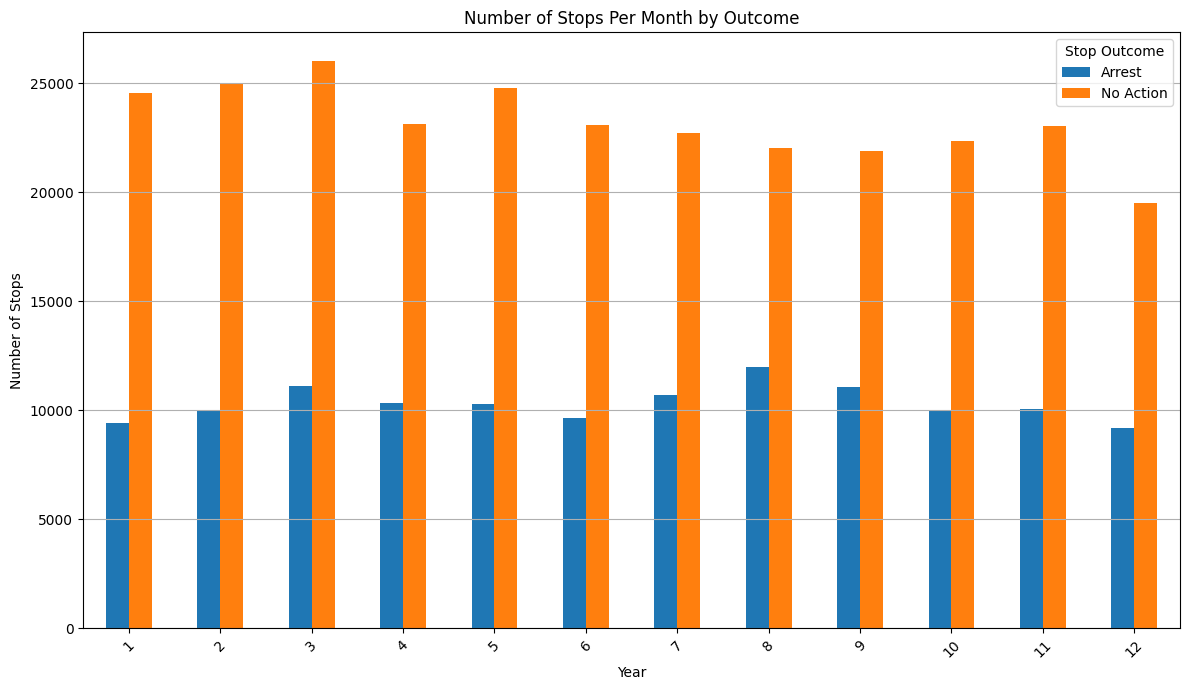

In [13]:
# month ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['month', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Month by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

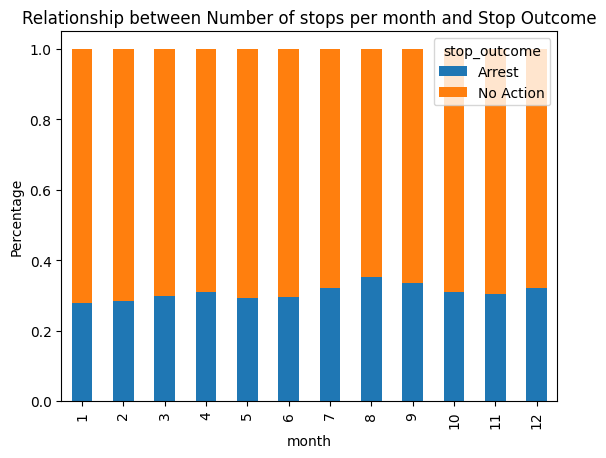

In [14]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per month and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['month'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per month and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

Month -> can be removed

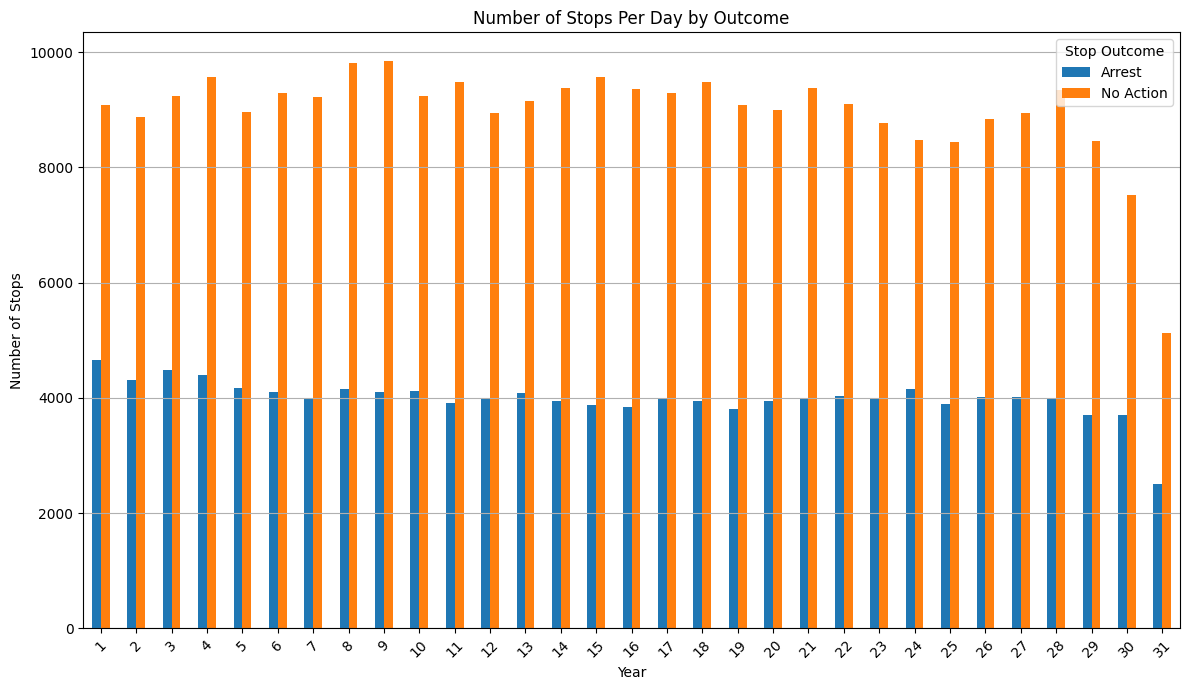

In [15]:
# day ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Day by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

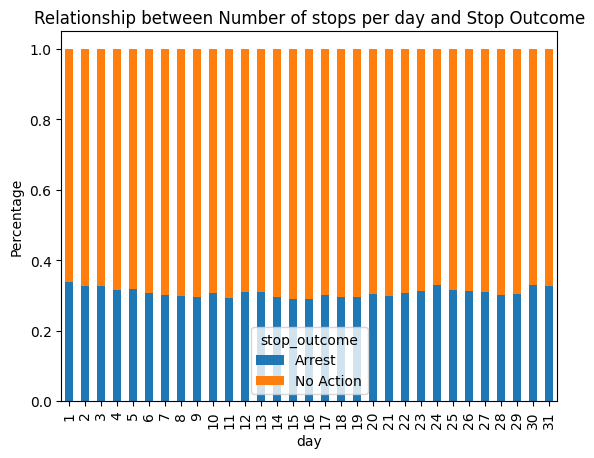

In [16]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per day and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per day and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

Day -> can be removed.

# 결론

In [17]:
# Drop  
df_encoded = df_encoded.drop(['year','month','day'], axis=1)

df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,False,False,False,False,False
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606


# *협의 필요 : 요일-체포 경향성 그래프

## **주말 검문

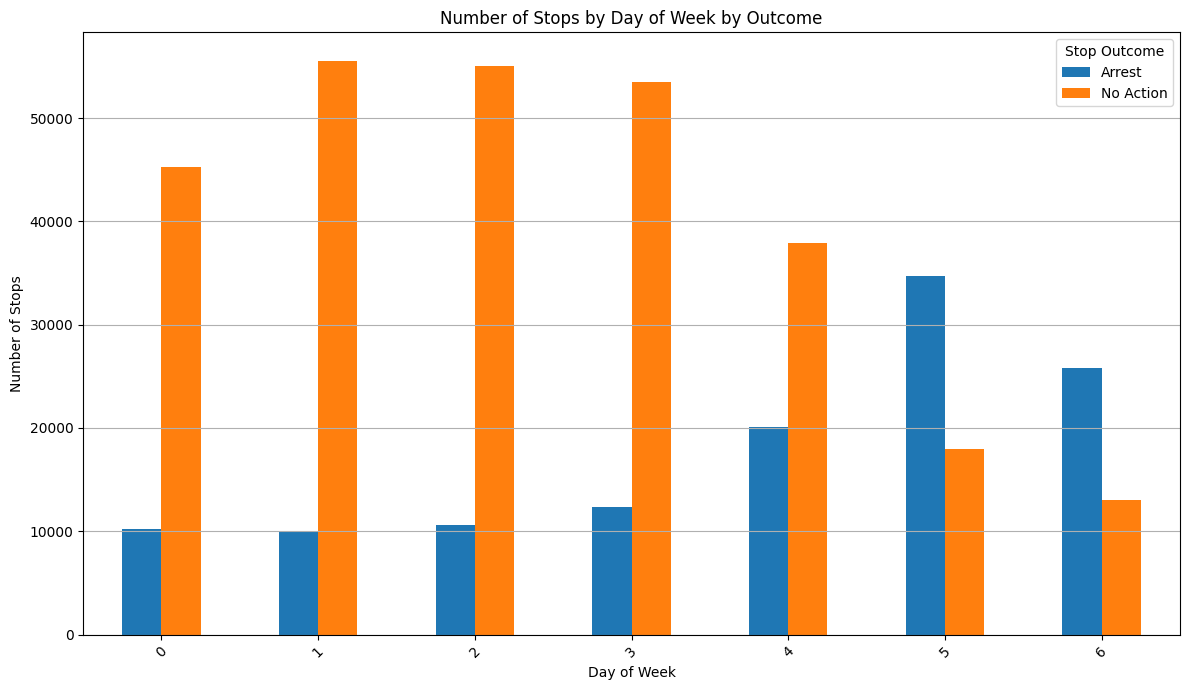

In [18]:
# day_of_week ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day_of_week', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops by Day of Week by Outcome')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

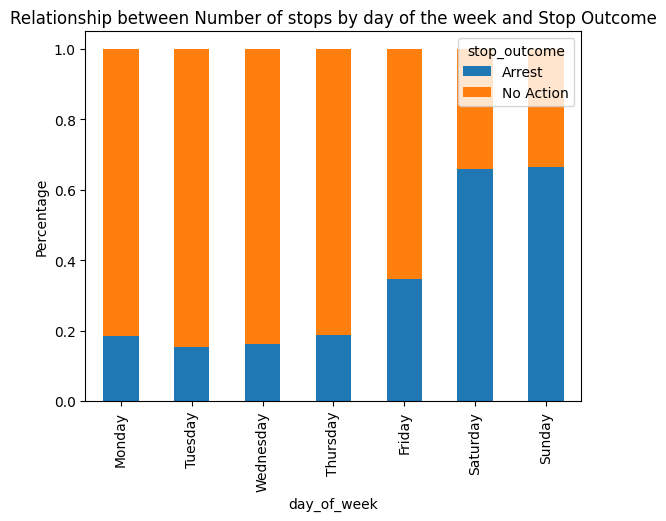

In [19]:
# 경향성은 있을수도...? 협의 사항

# Plot for Relationship between Number of stops by day of the week and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day_of_week'], df_encoded['stop_outcome'], normalize='index')

# Plot of day of week and stop outcome
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crosstab_normalized.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(7), labels=days)
plt.title('Relationship between Number of stops by day of the week and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

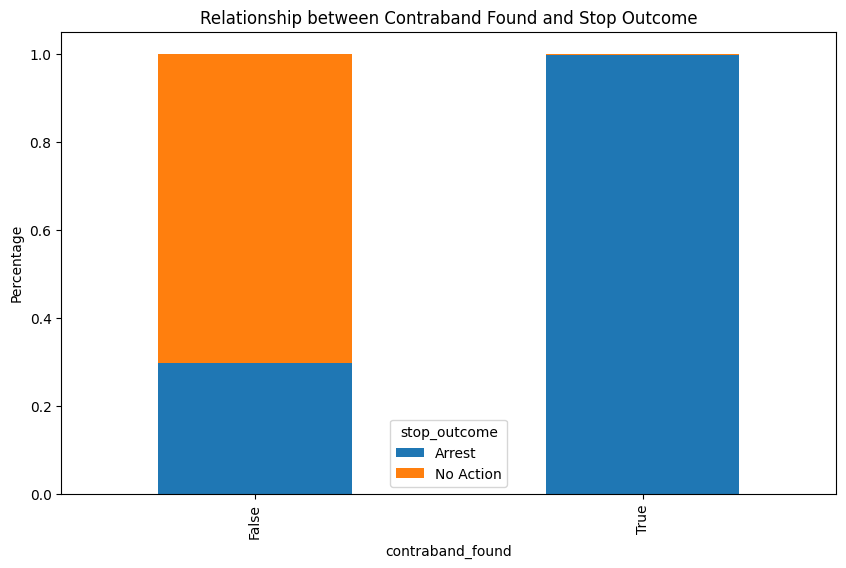

In [20]:
# contraband_found 컬럼이 true 일때는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['contraband_found'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()


In [21]:
# IF WE DONT NEED THIS COLUMNS, REMOVE THIS CODE.

# Initialize label encoder
le = LabelEncoder()

# Encode 'contraband_found' column
df_encoded['contraband_found'] = le.fit_transform(df_encoded['contraband_found'])


df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
violation,Speeding,Speeding,Speeding,Speeding,Speeding
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606


# *협의 필요 : Violation

## **Stop sign/light

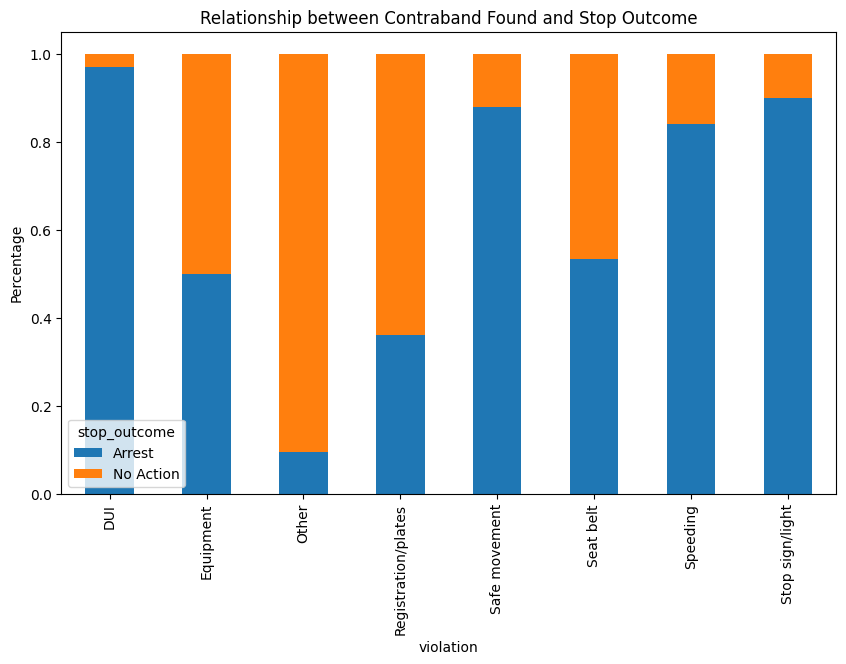

In [22]:
# 그래프를 보면 DUI는 Arrest와 경향성 비슷 / Other는 No Action과 비슷.

# Plot for Relationship between Violation and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['violation'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [23]:
# IF WE DECIDE TO USE ALL COLUMNS OF 'VIOLATION', DROP ONLY 'VIOLATION'
# REMOVE 'VIOLATION_DUI' IN THIS CODE

# One-hot encoding
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded['violation'], prefix='violation')], axis=1)

# Drop the original 'violation' column and the 'violation_DUI' column
df_encoded.drop(['violation', 'violation_DUI'], axis=1, inplace=True)

df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
driver_race_raw,W N,W N,B N,B N,U H
driver_race,White,White,Black,Black,Hispanic
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606
district,E3,E3,E3,E3,E3


# *협의 필요 : Race

## **Hispanic 데이터

In [24]:
#Check if driver_race_raw communicates anything specific about the sample
print("Relationship between 'driver_race' and 'driver_race_raw':\n",df.groupby(["driver_race", "driver_race_raw"]).size())

Relationship between 'driver_race' and 'driver_race_raw':
 driver_race  driver_race_raw
Asian        A N                  1774
Black        B N                102906
Hispanic     A H                    30
             B H                   422
             I H                    57
             U H                 26726
             W H                  3478
Other        I N                  3666
             U N                  4487
White        W N                258503
dtype: int64


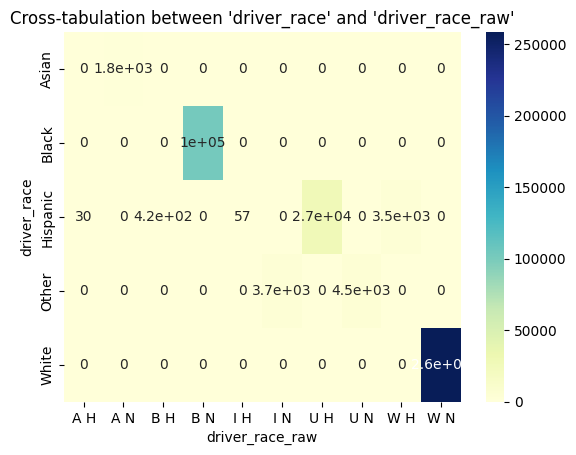

In [25]:
# Heatmap
ct = pd.crosstab(df['driver_race'], df['driver_race_raw'])
plt.figure()
sns.heatmap(ct, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Cross-tabulation between \'driver_race\' and \'driver_race_raw\'')
plt.show()

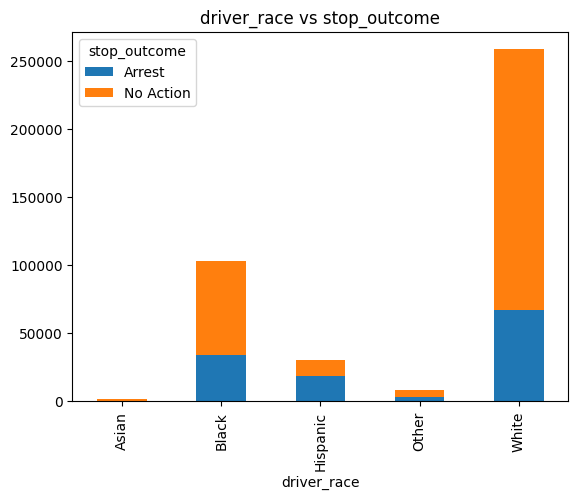

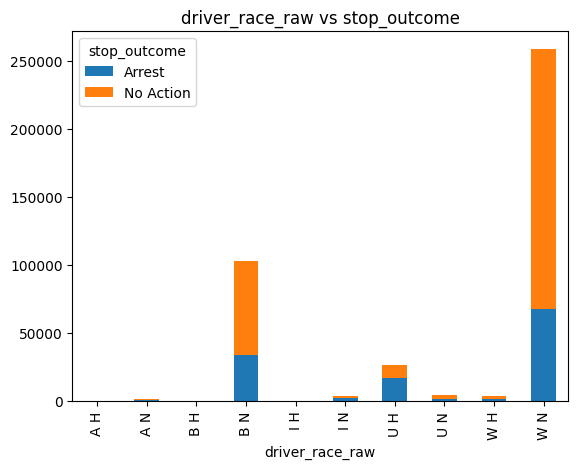

In [26]:
# Stacked Bar ~ stop_outcome
cross_tab_race = pd.crosstab(df['driver_race'], df['stop_outcome'])
cross_tab_race_raw = pd.crosstab(df['driver_race_raw'], df['stop_outcome'])

cross_tab_race.plot(kind='bar', stacked=True)
plt.title('driver_race vs stop_outcome')
plt.show()

cross_tab_race_raw.plot(kind='bar', stacked=True)
plt.title('driver_race_raw vs stop_outcome')
plt.show()

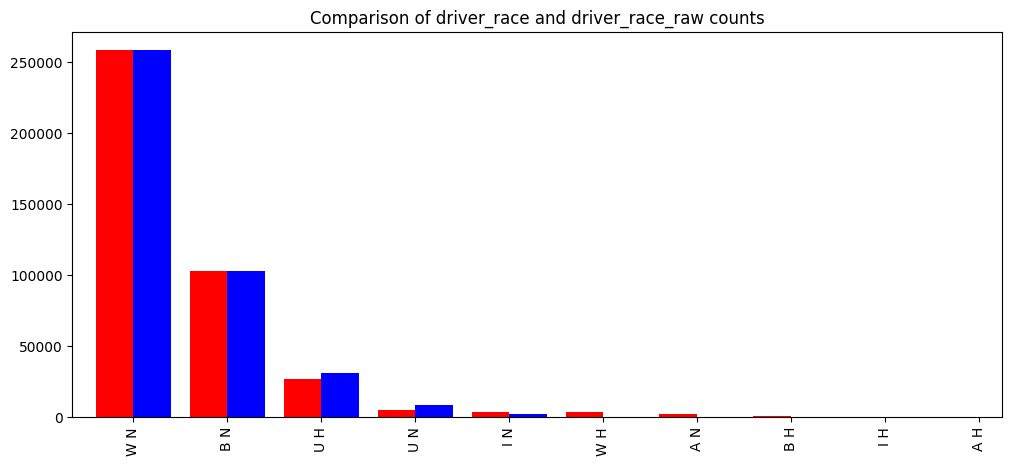

In [27]:
# Bar Plot (counting)
plt.figure(figsize=(12, 5))
df['driver_race'].value_counts().plot(kind='bar', position=0, color='blue', width=0.4)
df['driver_race_raw'].value_counts().plot(kind='bar', position=1, color='red', width=0.4)
plt.title('Comparison of driver_race and driver_race_raw counts')
plt.show()

In [28]:
df_encoded['driver_race'].count()

402049

In [29]:
count_hispanic = df_encoded['driver_race'].value_counts()['Hispanic']
print(f"Number of occurrences of 'Hispanic' in the 'driver_race' column: {count_hispanic}")

Number of occurrences of 'Hispanic' in the 'driver_race' column: 30713


In [30]:
30+422+57+26726+3478

30713

In [31]:
# Drop 'driver_race_raw'
df_encoded = df_encoded.drop('driver_race_raw', axis=1)

# One-hot encode 'driver_race' 
driver_race_dummies = pd.get_dummies(df_encoded['driver_race'], prefix='driver_race')
df_encoded = pd.concat([df_encoded, driver_race_dummies], axis=1)

# Drop the original 'driver_race' column from df_encoded
df_encoded = df_encoded.drop('driver_race', axis=1)

# test REMOVE before submit
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
search_basis,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
officer_id,10606,10606,10606,10606,10606
district,E3,E3,E3,E3,E3
day_of_week,0,0,0,0,0
violation_Equipment,0,0,0,0,0


In [32]:
## MuliLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

# Expand Comma-separated values 
df_encoded['search_basis'] = df_encoded['search_basis'].str.split(',')

mlb = MultiLabelBinarizer()
search_basis_encoded = mlb.fit_transform(df_encoded['search_basis'])
search_basis_df = pd.DataFrame(search_basis_encoded, columns=mlb.classes_)
df_encoded = pd.concat([df_encoded, search_basis_df], axis=1)

# Drop the original 'search_basis' column
df_encoded = df_encoded.drop('search_basis', axis=1)



In [33]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_No Search Conducted 컬럼이
# 0일 때(검색이 수행되지 않지 않다 == 검문을 했다)는 100% Arrest 임을 보여주는 그래프

# One-hot encoding for 'search_type'
dummies = pd.get_dummies(df_encoded['search_type'], prefix='search_type')

# Concatenate the one-hot encoded columns to df_encoded
df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Drop the original 'search_type' column
df_encoded = df_encoded.drop('search_type', axis=1)



In [34]:
df_encoded.head().T

,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0.0,0.0,0.0,0.0,0.0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
officer_id,10606.0,10606.0,10606.0,10606.0,10606.0
district,E3,E3,E3,E3,E3
day_of_week,0.0,0.0,0.0,0.0,0.0
violation_Equipment,0.0,0.0,0.0,0.0,0.0
violation_Other,0.0,0.0,0.0,0.0,0.0
violation_Registration/plates,0.0,0.0,0.0,0.0,0.0


In [35]:
## compare
print(df_encoded['search_type_No Search Conducted'].value_counts())
print(df_encoded['No Search Conducted'].value_counts())


1    346521
0     55566
Name: search_type_No Search Conducted, dtype: int64
1.0    346521
0.0     55528
Name: No Search Conducted, dtype: int64


search_type_No Search Conducted and No Search Conducted of search_basis are same. one of them should be dropped.

In [36]:
# Drop the 'No Search Conducted' column
df_encoded = df_encoded.drop('No Search Conducted', axis=1)


df_encoded.head().T


,0,1,2,3,4
driver_gender,M,F,F,M,M
driver_age,23.0,29.0,49.0,29.0,24.0
contraband_found,0.0,0.0,0.0,0.0,0.0
stop_outcome,Arrest,Arrest,Arrest,Arrest,Arrest
officer_id,10606.0,10606.0,10606.0,10606.0,10606.0
district,E3,E3,E3,E3,E3
day_of_week,0.0,0.0,0.0,0.0,0.0
violation_Equipment,0.0,0.0,0.0,0.0,0.0
violation_Other,0.0,0.0,0.0,0.0,0.0
violation_Registration/plates,0.0,0.0,0.0,0.0,0.0


## 아래 search_type_No Search Conducted & search_type_Incident to Arrest should be dropped? even if already No Search Conducted of 'search_basis' be removed.

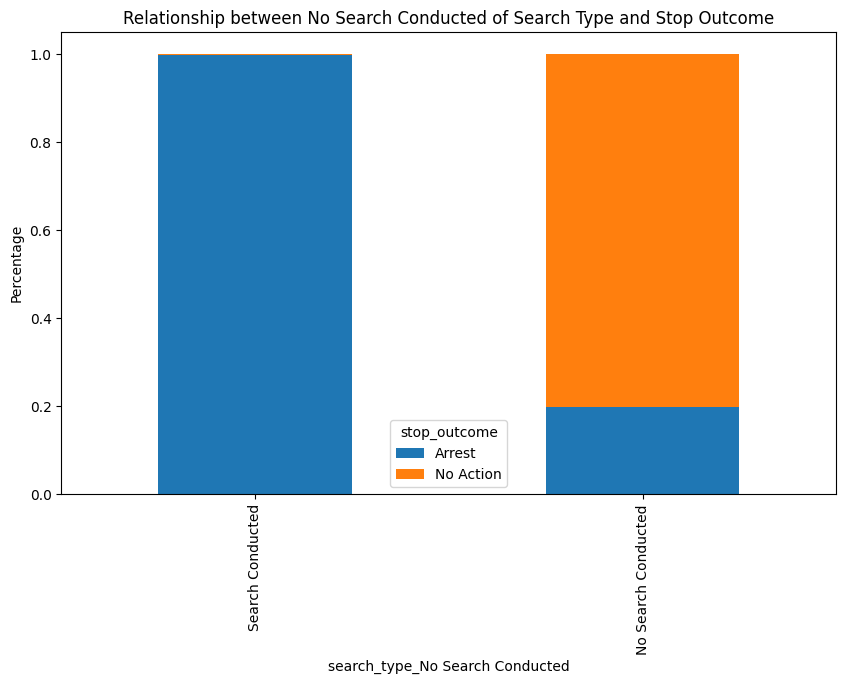

In [37]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_No Search Conducted 컬럼이
# 0일 때(검색이 수행되지 않지 않다 == 검문을 했다)는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between 'No Search Conducted' and 'Stop Outcome'

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['search_type_No Search Conducted'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
outcome = ['Search Conducted', 'No Search Conducted']
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(ticks=np.arange(2), labels=outcome)
plt.title('Relationship between No Search Conducted of Search Type and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

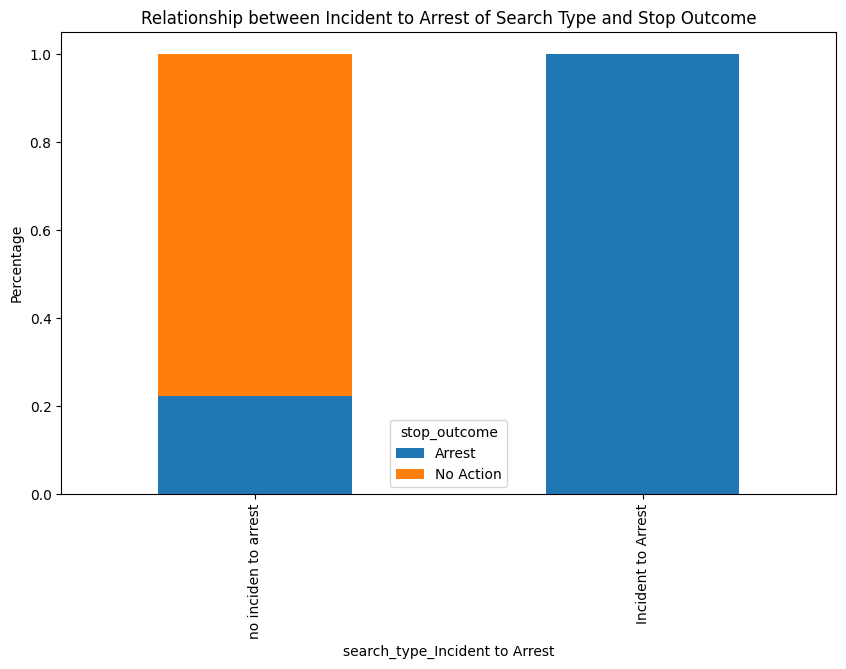

In [38]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_Incident to Arrest 컬럼이
# 1일 때(체포되었음)는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['search_type_Incident to Arrest'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
outcome = ['no inciden to arrest','Incident to Arrest']
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(ticks=np.arange(2), labels=outcome)
plt.title('Relationship between Incident to Arrest of Search Type and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [39]:
# IF WE DECIDE TO USE ALL COLUMNS OF 'SEARCH_TYPE', DROP ONLY 'VIOLATION'
# REMOVE 'SEARCH_TYPE_' IN THIS CODE

# Drop the original 'search_type' column and the 'search_type' column
# df_encoded.drop(['search_type_No Search Conducted', 'search_type_Incident to Arrest'], axis=1, inplace=True)

df_encoded.head()

,driver_gender,driver_age,contraband_found,stop_outcome,officer_id,district,day_of_week,violation_Equipment,violation_Other,violation_Registration/plates,...,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,M,23.0,0.0,Arrest,10606.0,E3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
1,F,29.0,0.0,Arrest,10606.0,E3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
2,F,49.0,0.0,Arrest,10606.0,E3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,M,29.0,0.0,Arrest,10606.0,E3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,M,24.0,0.0,Arrest,10606.0,E3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0


In [40]:
# Not used Columns are removed
df_encoded.drop(['officer_id', 'district'], axis=1, inplace=True)

# Label encoding for binary columns 
encoder = LabelEncoder()
for col in ['driver_gender','stop_outcome']:
    df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])

/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_23953/3413136491.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])


## 마지막 Preprocessing 확인

In [41]:
df_encoded.head()

,driver_gender,driver_age,contraband_found,stop_outcome,day_of_week,violation_Equipment,violation_Other,violation_Registration/plates,violation_Safe movement,violation_Seat belt,...,Observation Suspected Contraband,Other Official Info,Suspicious Movement,Witness Observation,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,1,23.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
1,0,29.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
2,0,49.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,1,29.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,1,24.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,0


### Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier, which always predicts “not arrested”.

# k-NN model
1. splitting data : to split data into training ans test sets
2. normalization : normalizise the features so that they have a sclae btw 0 and 1.
3. Model training & evaluation : train k-NN model and evaluate its performance.

In [ ]:
# Import necessary package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Splitting the data
X = df_encoded.drop('stop_outcome', axis=1)
y = df_encoded['stop_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalization
# MinMaxScaler normalize the feature to btw 0~1 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training & Evaluation

# Choosing 'k' for k-NN can be a bit tricky. As a starting point,
# Use sqrt(n) where n is the number of samples in the training set.
k = int(np.sqrt(len(X_train)))
if k % 2 == 0:  # Making sure k is odd to avoid ties
    k += 1

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

### only standardization
### only normalization
### std and norm ?


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = list(X_train.columns)
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

In [ ]:
# convert to DataFrame
# Convert the standardized NumPy array back to a DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train.columns)

# Display the top rows of the standardized DataFrame
X_train_standardized_df.head().T


In [ ]:
# creating correlation matrix for feature selection
corr = X.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='YlGnBu', linecolor="white", fmt='.2f')

# Adjusting the font size for x-axis and y-axis labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Correlation between features', fontsize=20)
plt.show()
